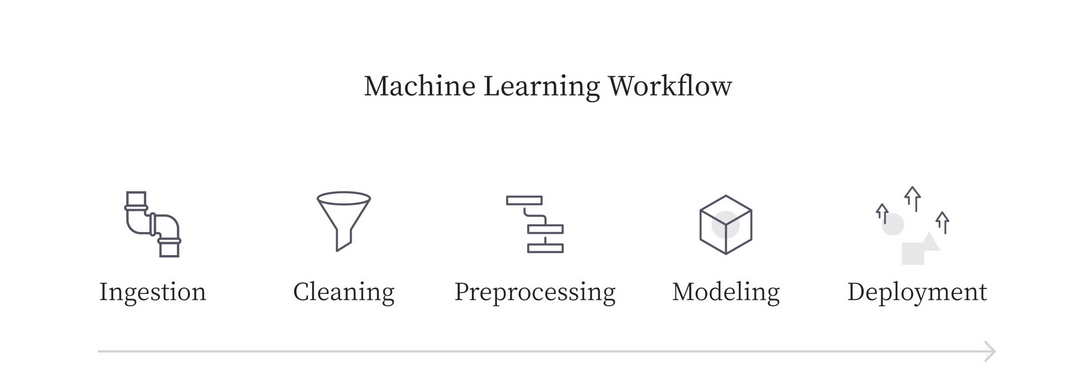

In [32]:
from IPython.display  import Image
Image(filename ="Capture.PNG")

In [33]:
#filtering warnings

import warnings
warnings.filterwarnings("ignore")

In [34]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split





In [35]:
df = pd.read_csv("diabetes.csv")

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# seperating the independent and the dependent variables.Outcome is the dependent variable
X = df.drop("Outcome",axis=1)
Y = df[["Outcome"]]

In [38]:
X.head()
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [39]:
# Dividing the data into train and test

X_train ,X_test ,y_train ,y_test = train_test_split(X,Y,test_size= 0.3,random_state=1)

# Creating Pipelines for the entire DATA

Pipeline steps will include
1) Data preprocessing using MinMaxScaler (standardization)
2) Reducing dimensionalty using PCA
3) Training the respective Models
4) We have used 3 models here logistic regression , Decison Tree classifer and Random forest Classifier


In [40]:
# Logistic Regression pipeline

LogisticRegressionPipeline = Pipeline([('scaler',MinMaxScaler()),
                                    ('mypca',PCA(n_components=3)),
                                    ('logisticRegression',LogisticRegression())])

In [41]:
# Decision Tree classifier Pipeline

DecisionTreePipeline = Pipeline([('scaler',MinMaxScaler()),
                                    ('mypca',PCA(n_components=3)),
                                    ('decisiontree',DecisionTreeClassifier())])

In [42]:
#Random Forest pipeline

RandomForestPipeline = Pipeline([('scaler',MinMaxScaler()),
                                    ('mypca',PCA(n_components=3)),
                                    ('randomforest',RandomForestClassifier())])

# Model Training and validation

1) the three mentioned pipelines will be run in a loop and the results will be generated
2) Variables used to decide or choose the best model are 
     accuracy,
    classifier name,
     pipeline name.

In [43]:
# defining the pipelines in a list

mypipeline = [LogisticRegressionPipeline,DecisionTreePipeline,RandomForestPipeline]

In [44]:
 #defining variables for chosing the best model
 
 accuracy = 0.0
 clasifier = 0
 pipeline = ""

In [45]:
#creating a dictionary for the piplines and training all the models
 
Pipeline_dict = {0:"Logistic Regression",1:"Decsion Tree Classifer",2:"Random Forest Classifier"}

#fitting all the pipelines into the training data
for mypipe in mypipeline:
    mypipe.fit(X_train,y_train)

In [46]:
#getting the test accuracy for all classifiers

for i , model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(Pipeline_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.70995670995671
Decsion Tree Classifer Test Accuracy: 0.6666666666666666
Random Forest Classifier Test Accuracy: 0.7402597402597403


In [47]:
#choosing the best model for the given data

for i,model in enumerate(mypipeline):
        if model.score(X_test,y_test)> accuracy:
            accuracy = model.score(X_test,y_test)
            pipeline = model
            clasifier =i

print("classifier with the best accuracy:{}".format(Pipeline_dict[clasifier]))





classifier with the best accuracy:Random Forest Classifier
